#Завдання на використання Pandas + SQL

В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робили в попередній домашці:

In [4]:
import mysql.connector
from mysql.connector.connection import MySQLConnection

import pandas as pd

In [6]:
con = mysql.connector.connect(user='root', password='Sheik1337',
                                        host='127.0.0.1', database='employees')

1. Виведіть кількість співробітників за роком, в який вони були найняті (hire_date) використовуючи pandas.read_sql. Запишіть результат в змінну df та виведіть значення змінної на екран.

In [8]:
df = pd.read_sql('SELECT * FROM employees', con)
df

/var/folders/18/v6tsqf5s6tn983tw5hm40jb00000gn/T/ipykernel_18549/1694516836.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT * FROM employees', con)


,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


q = "SELECT orderNumber, count(1) FROM df group by orderNumber"

In [34]:
df = pd.read_sql(
    """
    SELECT 
        YEAR(hire_date) AS hire_year, 
        count(1) as emp_num 
    FROM employees
    GROUP BY hire_year
    ORDER BY hire_year ASC;
    """, con)
df

/var/folders/18/v6tsqf5s6tn983tw5hm40jb00000gn/T/ipykernel_18549/1650107773.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(


,hire_year,emp_num
0,1985,35316
1,1986,36150
2,1987,33501
3,1988,31436
4,1989,28394
5,1990,25610
6,1991,22568
7,1992,20402
8,1993,17772
9,1994,14835


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1JmyPlxFwRRxuCJ33VN-AqMDPSdV_DPXI)

2. Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

In [24]:
import matplotlib.pyplot as plt

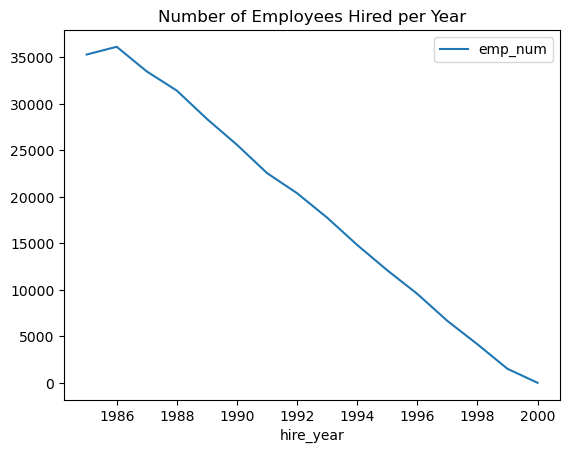

In [36]:
plt.plot(df['hire_year'], df['emp_num'], label='emp_num')
plt.xlabel('hire_year')
plt.ylabel('')
plt.title('Number of Employees Hired per Year')
plt.legend()
plt.show();


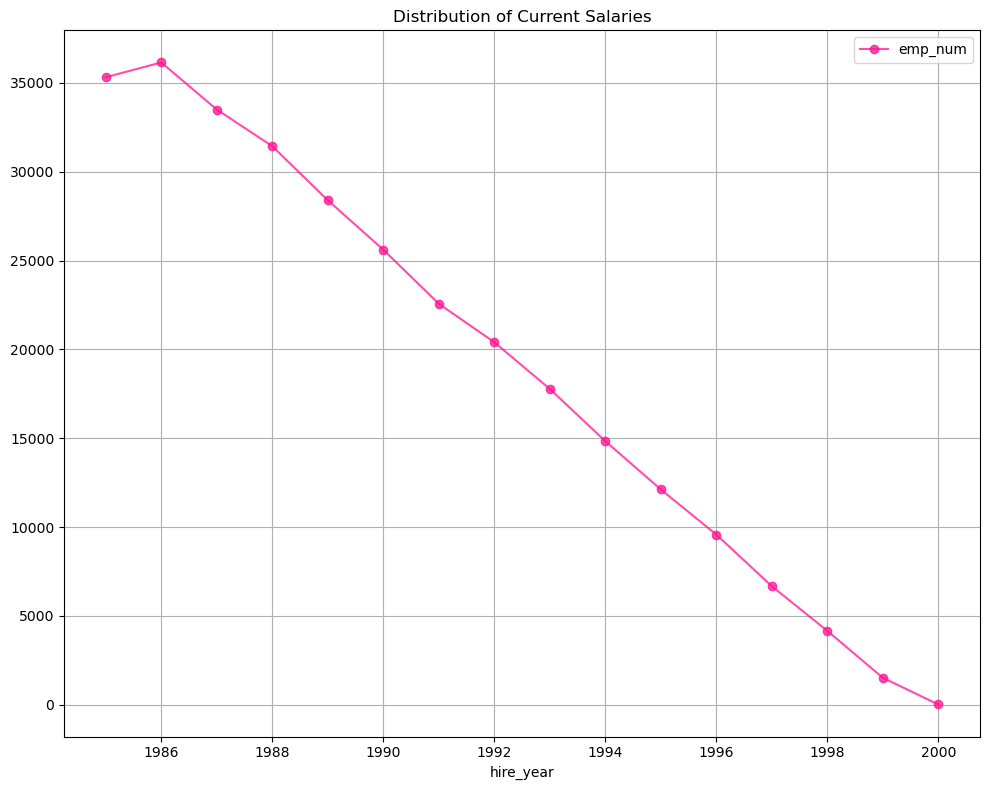

In [39]:
fig, ax = plt.subplots(figsize=(10, 8))


ax.plot(df['hire_year'], 
        df['emp_num'], 
        marker='o',
        color='deeppink',
        alpha=0.76)

ax.set(
    title='Distribution of Current Salaries',
    xlabel='hire_year'

)

ax.legend(['emp_num'])
ax.grid(True)
fig.tight_layout()
plt.show();

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1vXUpPNNvIL5dxsypr9sklvtq-H-NDwzU)

3. З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [63]:
df_years = pd.read_sql(
    """
    SELECT from_date, to_date, TIMESTAMPDIFF(YEAR, from_date, to_date) AS duration
    FROM titles 
    WHERE title = 'Engineer' AND to_date <> '9999-01-01';
    """, con
)
df_years

/var/folders/18/v6tsqf5s6tn983tw5hm40jb00000gn/T/ipykernel_18549/2474044339.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_years = pd.read_sql(


,from_date,to_date,duration
0,1986-12-01,1995-12-01,9
1,1990-02-18,1995-02-18,5
2,1992-12-18,2000-12-18,8
3,1987-04-03,1995-04-03,8
4,1995-03-20,2001-03-19,5
...,...,...,...
84015,1989-11-23,1998-11-23,9
84016,1989-07-30,1994-07-30,5
84017,1993-02-22,1993-10-27,0
84018,1996-05-13,2002-05-13,6


In [57]:
df_years

,emp_no,title,from_date,to_date
0,10004,Engineer,1986-12-01,1995-12-01
1,10009,Engineer,1990-02-18,1995-02-18
2,10012,Engineer,1992-12-18,2000-12-18
3,10018,Engineer,1987-04-03,1995-04-03
4,10026,Engineer,1995-03-20,2001-03-19
...,...,...,...,...
84015,499972,Engineer,1989-11-23,1998-11-23
84016,499984,Engineer,1989-07-30,1994-07-30
84017,499994,Engineer,1993-02-22,1993-10-27
84018,499996,Engineer,1996-05-13,2002-05-13


In [58]:
df_years['emp_no'].value_counts()

emp_no
10004     1
299884    1
299872    1
299869    1
299867    1
         ..
109523    1
109518    1
109515    1
109509    1
499997    1
Name: count, Length: 84020, dtype: int64

In [ ]:
df_y = pd.read_sql(
    """
    SELECT emp_no, title, MAX(from_date) AS last_from_date, MAX(to_date) AS last_to_date
    FROM titles
    WHERE title = 'Engineer'
      AND to_date <> '9999-01-01'
    GROUP BY emp_no, title;
    """, con)
df_y


/var/folders/18/v6tsqf5s6tn983tw5hm40jb00000gn/T/ipykernel_18549/263946627.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_y = pd.read_sql(


,emp_no,title,last_from_date,last_to_date
0,10004,Engineer,1986-12-01,1995-12-01
1,10009,Engineer,1990-02-18,1995-02-18
2,10012,Engineer,1992-12-18,2000-12-18
3,10018,Engineer,1987-04-03,1995-04-03
4,10026,Engineer,1995-03-20,2001-03-19
...,...,...,...,...
84015,499972,Engineer,1989-11-23,1998-11-23
84016,499984,Engineer,1989-07-30,1994-07-30
84017,499994,Engineer,1993-02-22,1993-10-27
84018,499996,Engineer,1996-05-13,2002-05-13


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1nBqeBVYFuSQlMx9lNaDJJ_8hMx7yV9bX)

4. Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

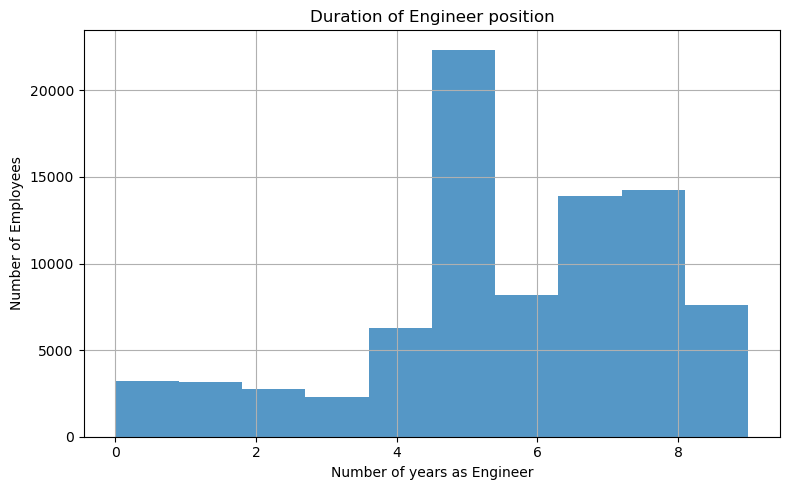

In [71]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.hist(x = df_years['duration'],
        bins=10,
        #edgecolor='purple',
        alpha=0.76)

ax.set(
    title='Duration of Engineer position',
    xlabel='Number of years as Engineer',
    ylabel='Number of Employees',

)

ax.grid(True)
fig.tight_layout()
plt.show();

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1RKbfs5R9oniNs9XJcUpdlXFT-0BKXvPB)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [72]:
con.close()